# Spectrograms Playground

In [ ]:
#Inspect spectrogram function from the provious code.

In [3]:
import librosa
import sys
sys.path.append("./../../")
sys.path.append("./../data")
sys.path.append("./../utils")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from data_loader import DataLoader
import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dl = DataLoader(
    pathlib.Path("/Users/adamnarozniak/BachelorThesis/bower/data/processed"),
    pathlib.Path("/Users/adamnarozniak/BachelorThesis/bower/data/processed/files.csv"))

In [6]:
data = dl.load_data()

2022-04-20 11:05:53.079 | INFO     | data_loader:load_data:39 - Data loading started
2022-04-20 11:05:55.431 | INFO     | data_loader:load_data:44 - Data loading done


In [11]:
def spectrogram(samples, sample_rate, fft, hop_length, window, max_freq=None):
    """Converts audio samples to spectrogram.

    Args:
        samples (ndarray): 1D array of samples.
        sample_rate (float): Sample rate.
        fft (int): FFT frame width in seconds.
        hop_length (int): Hop length in seconds.
        window (str): Window function to apply on frame.
        max_freq (int, optional): Maximal frequency to cut spectrogram values. If None do not cut. Defaults to None.

    Returns:
        ndarray: 2D array of spectrogram values.
    """
    D = librosa.amplitude_to_db(np.abs(librosa.stft(
        samples, n_fft=int(fft * sample_rate), hop_length=int(hop_length * sample_rate), window=window)))
    if max_freq is not None:
        bins_amount = int(len(D) * max_freq / (sample_rate / 2))
        D = D[:bins_amount, :]
    return D

In [12]:
samples =  data.iloc[0].values[0] # bad name (it's a sample - one audio clip)
sample_rate = 44_100
fft = 0.01
hop_length = 0.0025
window = "hann"
max_freq = None

In [13]:
spec = spectrogram(samples, sample_rate, fft, hop_length, window, max_freq)

In [14]:
spec.shape

(221, 802)

(0.0, 2000.0)

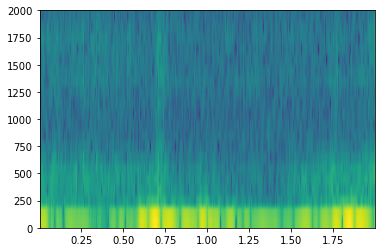

In [15]:
fig, ax = plt.subplots()
ax.specgram(samples, Fs=sample_rate, NFFT=int(fft*sample_rate), scale="dB");
ax.set_ylim(0, 2_000)

##  Create other spectrograms

In [16]:
from scipy import signal

In [69]:
hop_length=int(hop_length * sample_rate)
hop_length

110

In [107]:
#novelap - I'm not sure
_, _, S = signal.spectrogram(samples, window="hann", nperseg=441, noverlap=331, detrend="constant")

In [108]:
spec.shape

(221, 802)

In [88]:
# 221 is the number of bins of freq (is the y axis)
# in case of 21_050, each bean represents either 100 Hz (and last one 50)or 
# 22_050/221 Hz each

In [89]:
S.shape

(221, 798)

In [21]:
S[:, :700] == spec[:, :700]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [22]:
spec

array([[  4.8806186,   4.8712063,   4.8458023, ...,  -6.669741 ,
         -3.8713393,  -2.1717272],
       [ -1.2110854,  -1.0643731,  -1.2626274, ..., -12.277464 ,
         -9.410615 ,  -7.8606486],
       [-35.719696 , -36.24215  , -36.74453  , ..., -33.13354  ,
        -31.836502 , -31.695312 ],
       ...,
       [-60.668495 , -60.668495 , -60.400345 , ..., -60.668495 ,
        -57.517742 , -55.160328 ],
       [-60.668495 , -60.668495 , -59.50182  , ..., -60.668495 ,
        -60.668495 , -60.668495 ],
       [-60.668495 , -60.668495 , -60.668495 , ..., -60.668495 ,
        -60.668495 , -60.668495 ]], dtype=float32)

In [23]:
S

array([[1.30917481e-03, 3.53118731e-03, 8.74445075e-04, ...,
        1.80691888e-03, 2.79881340e-03, 2.87914561e-04],
       [1.36681029e-03, 4.11708513e-03, 7.14500248e-03, ...,
        2.82030506e-03, 5.91269322e-03, 6.92216773e-03],
       [1.13119790e-03, 1.02353224e-03, 2.47702608e-03, ...,
        2.47300137e-03, 1.24951161e-03, 1.71430467e-03],
       ...,
       [7.42587799e-05, 1.01750775e-04, 5.71685305e-05, ...,
        3.16330188e-05, 5.93130790e-05, 2.57304819e-05],
       [8.23519513e-05, 8.33153026e-05, 6.32553492e-05, ...,
        5.64648399e-05, 2.47410644e-05, 4.67994651e-05],
       [4.18332856e-05, 3.44718246e-05, 5.37524975e-05, ...,
        6.54552932e-05, 4.63783326e-05, 6.50114307e-05]], dtype=float32)

In [24]:
librosa.amplitude_to_db(S)

array([[-57.660046, -49.041588, -61.165348, ..., -54.861225, -51.06052 ,
        -70.81473 ],
       [-57.285835, -47.708202, -42.919952, ..., -50.994076, -44.564293,
        -43.195156],
       [-58.92923 , -59.79797 , -52.121387, ..., -52.135513, -58.065193,
        -55.31824 ],
       ...,
       [-82.58504 , -79.84924 , -84.856865, ..., -89.997185, -84.53699 ,
        -91.79104 ],
       [-81.68652 , -81.5855  , -83.97805 , ..., -84.96444 , -92.13164 ,
        -86.595184],
       [-87.569565, -89.25072 , -85.39203 , ..., -83.68111 , -86.6737  ,
        -83.740204]], dtype=float32)

In [25]:
S == spec

/var/folders/gy/rfmz3mqx3x17yd9b049zwpjw0000gn/T/ipykernel_11033/1742671466.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  S == spec


False

In [26]:
2*44_100 * 0.01

882.0

In [27]:
0.0025* 44_100

110.25

## The same function as in the code but in scipy

In [102]:
f, t, Zxx = signal.stft(samples, nperseg=441, noverlap=331, nfft=441)

In [103]:
signal.stft??

In [104]:
Zxx.shape

(221, 803)

In [101]:
f * 44_100.

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
        5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
        6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,
        7200.,  7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,
        8000.,  8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,
        8800.,  8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,
        9600.,  9700.,  9800.,  9900., 10000., 10100., 10200., 10300.,
       10400., 10500., 10600., 10700., 10800., 10900., 11000., 11100.,
      

In [50]:
Zxx[f<2_000, :].shape

(221, 803)

In [38]:
(2.0 - 0.01)/0.01 + 1

200.0

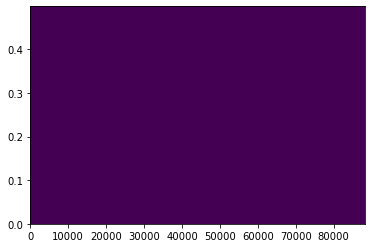

In [36]:
fig, ax = plt.subplots()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=2000, shading='gouraud')

In [31]:
S = np.abs(librosa.stft(samples, n_fft=441, hop_length=110, center=False))

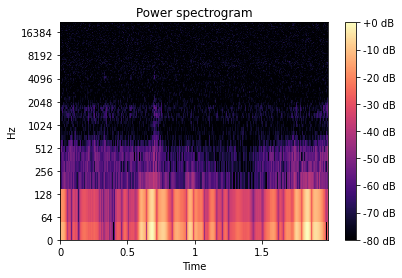

In [32]:
import librosa.display
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', sr=44_100, hop_length=110, ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

/Users/adamnarozniak/Applications/miniconda3/envs/bowel/lib/python3.9/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


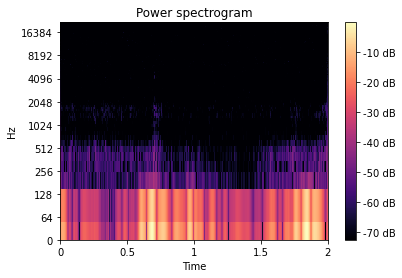

In [33]:
import librosa.display
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(Zxx,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', sr=44_100, hop_length=110, ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")